<div style="padding: 40px; border-radius: 10px; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">💸🛡️ INSURANCE PREMIUM PREDICTION NOTEBOOK </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;"></p>
    <img src="./src/insurance.gif" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>


## <div style="border-radius:0px; border: #66FF99 solid; padding: 15px; ont-size:100%; text-align:center">1. Import Libraries</div>

In [3]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'


import warnings
warnings.filterwarnings("ignore")

## <div style="border-radius:0px; border: #66FF99 solid; padding: 15px; font-size:100%; text-align:center">2. Read and Explain Dataset</div>

In [4]:
data_final =  pd.read_csv("./data/test.csv") 
data_final2 =  pd.read_csv("./data/test.csv") 


data_original =  pd.read_csv("./data/train.csv") 
data = pd.read_csv("./data/train.csv") 

def table(data):
    return data.sample(6).reset_index(drop=True).style.set_properties(**{'border-color':  '#66FF99 solid'})

table(data)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,656118,41.000000,Male,104411.000000,Single,4.000000,High School,nan,51.295946,Rural,Comprehensive,nan,2.000000,842.000000,8.000000,2022-05-25 15:21:39.182597,Poor,Yes,Daily,Condo,3378.000000
1,872486,56.000000,Male,29669.000000,Divorced,0.000000,PhD,nan,23.181618,Rural,Premium,0.000000,13.000000,446.000000,9.000000,2020-04-17 15:21:39.263607,Good,No,Weekly,Condo,2271.000000
2,990517,45.000000,Male,9084.000000,Married,nan,High School,Unemployed,22.539598,Rural,Basic,0.000000,16.000000,710.000000,3.000000,2023-09-21 15:21:39.274993,Poor,Yes,Rarely,House,2102.000000
3,959239,31.000000,Female,1334.000000,Single,2.000000,High School,Unemployed,33.908572,Rural,Premium,2.000000,11.000000,782.000000,6.000000,2021-01-19 15:21:39.265513,Good,No,Rarely,House,1442.000000
4,711593,43.000000,Female,15886.000000,Single,0.000000,Bachelor's,nan,6.836805,Rural,Comprehensive,nan,0.000000,665.000000,2.000000,2024-06-24 15:21:39.249100,nan,No,Monthly,Apartment,2126.000000
5,340555,41.000000,Female,20276.000000,Married,1.000000,Master's,Unemployed,33.573462,Urban,Basic,0.000000,14.000000,nan,4.000000,2021-05-14 15:21:39.259788,Good,Yes,Daily,Condo,421.000000



# Dataset Overview
This dataset contains over **200,000 rows** and **20 features** with a mix of categorical, numerical, and text data. It includes challenges such as missing values, incorrect data types, and skewed distributions, simulating complexities typical in real-world datasets. The target variable for prediction is **"Premium Amount"**.

## Features
### 1. **Age**
- **Type**: Numerical  
- **Description**: Age of the insured individual.

### 2. **Gender**
- **Type**: Categorical  
- **Categories**: Male, Female  
- **Description**: Gender of the insured individual.

### 3. **Annual Income**
- **Type**: Numerical (Skewed)  
- **Description**: Annual income of the insured individual.

### 4. **Marital Status**
- **Type**: Categorical  
- **Categories**: Single, Married, Divorced  
- **Description**: Marital status of the insured individual.

### 5. **Number of Dependents**
- **Type**: Numerical  
- **Description**: Number of dependents.  
- **Notes**: Contains missing values.

### 6. **Education Level**
- **Type**: Categorical  
- **Categories**: High School, Bachelor's, Master's, PhD  
- **Description**: Highest education level attained.

### 7. **Occupation**
- **Type**: Categorical  
- **Categories**: Employed, Self-Employed, Unemployed  
- **Description**: Occupation of the insured individual.

### 8. **Health Score**
- **Type**: Numerical (Skewed)  
- **Description**: A score representing the health status.

### 9. **Location**
- **Type**: Categorical  
- **Categories**: Urban, Suburban, Rural  
- **Description**: Type of location.

### 10. **Policy Type**
- **Type**: Categorical  
- **Categories**: Basic, Comprehensive, Premium  
- **Description**: Type of insurance policy.

### 11. **Previous Claims**
- **Type**: Numerical  
- **Description**: Number of previous claims made.  
- **Notes**: Contains outliers.

### 12. **Vehicle Age**
- **Type**: Numerical  
- **Description**: Age of the insured vehicle.

### 13. **Credit Score**
- **Type**: Numerical  
- **Description**: Credit score of the insured individual.  
- **Notes**: Contains missing values.

### 14. **Insurance Duration**
- **Type**: Numerical  
- **Description**: Duration of the insurance policy (in years).

### 15. **Premium Amount**
- **Type**: Numerical (Skewed)  
- **Description**: Target variable representing the insurance premium amount.

### 16. **Policy Start Date**
- **Type**: Text  
- **Description**: Start date of the insurance policy.  
- **Notes**: Contains improperly formatted dates.

### 17. **Customer Feedback**
- **Type**: Text  
- **Description**: Short feedback comments from customers.

### 18. **Smoking Status**
- **Type**: Categorical  
- **Categories**: Yes, No  
- **Description**: Smoking status of the insured individual.

### 19. **Exercise Frequency**
- **Type**: Categorical  
- **Categories**: Daily, Weekly, Monthly, Rarely  
- **Description**: Frequency of exercise.

### 20. **Property Type**
- **Type**: Categorical  
- **Categories**: House, Apartment, Condo  
- **Description**: Type of property owned.



## <div style="border-radius:0px; border:#66FF99 solid; padding: 15px; font-size:100%; text-align:center">3. Exploratory Data Analysis</div>

In [5]:
data.shape

(1200000, 21)

In [6]:
data_final.shape

(800000, 20)

In [7]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
data.tail()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0
1199999,1199999,21.0,Female,NaN,Divorced,0.0,PhD,NaN,10.125323,Rural,...,0.0,18.0,502.0,6.0,2020-08-26 15:21:39.155231,Good,Yes,Monthly,House,2480.0


In [9]:
data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [11]:
data.isna().sum()


id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [12]:
data.nunique()

id                      1200000
Age                          47
Gender                        2
Annual Income             88593
Marital Status                3
Number of Dependents          5
Education Level               4
Occupation                    3
Health Score             532657
Location                      3
Policy Type                   3
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
Policy Start Date        167381
Customer Feedback             3
Smoking Status                2
Exercise Frequency            4
Property Type                 3
Premium Amount             4794
dtype: int64

In [13]:
data['Premium Amount'].value_counts()


Premium Amount
25.0      4268
24.0      3901
20.0      3849
23.0      3524
28.0      3418
          ... 
3991.0       1
4466.0       1
4793.0       1
4221.0       1
4925.0       1
Name: count, Length: 4794, dtype: int64

In [14]:
data.select_dtypes(exclude=['object']).corr()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
id,1.000000,-0.000135,-0.000887,0.000753,0.001414,-0.000162,-0.001461,0.000973,-0.000350,-0.000292
Age,-0.000135,1.000000,-0.000009,0.001475,0.000881,0.001869,-0.002455,0.002842,-0.000064,-0.002430
Annual Income,-0.000887,-0.000009,1.000000,0.002135,0.025530,0.043065,-0.000500,-0.201423,0.000379,-0.012390
Number of Dependents,0.000753,0.001475,0.002135,1.000000,0.005152,-0.004123,0.001232,-0.001714,-0.000265,-0.000976
Health Score,0.001414,0.000881,0.025530,0.005152,1.000000,0.001989,0.000316,0.012016,0.002487,0.014704
Previous Claims,-0.000162,0.001869,0.043065,-0.004123,0.001989,1.000000,-0.001172,0.036816,0.003001,0.046874
Vehicle Age,-0.001461,-0.002455,-0.000500,0.001232,0.000316,-0.001172,1.000000,0.000508,0.003132,0.000391
Credit Score,0.000973,0.002842,-0.201423,-0.001714,0.012016,0.036816,0.000508,1.000000,0.000493,-0.026014
Insurance Duration,-0.000350,-0.000064,0.000379,-0.000265,0.002487,0.003001,0.003132,0.000493,1.000000,-0.000028
Premium Amount,-0.000292,-0.002430,-0.012390,-0.000976,0.014704,0.046874,0.000391,-0.026014,-0.000028,1.000000


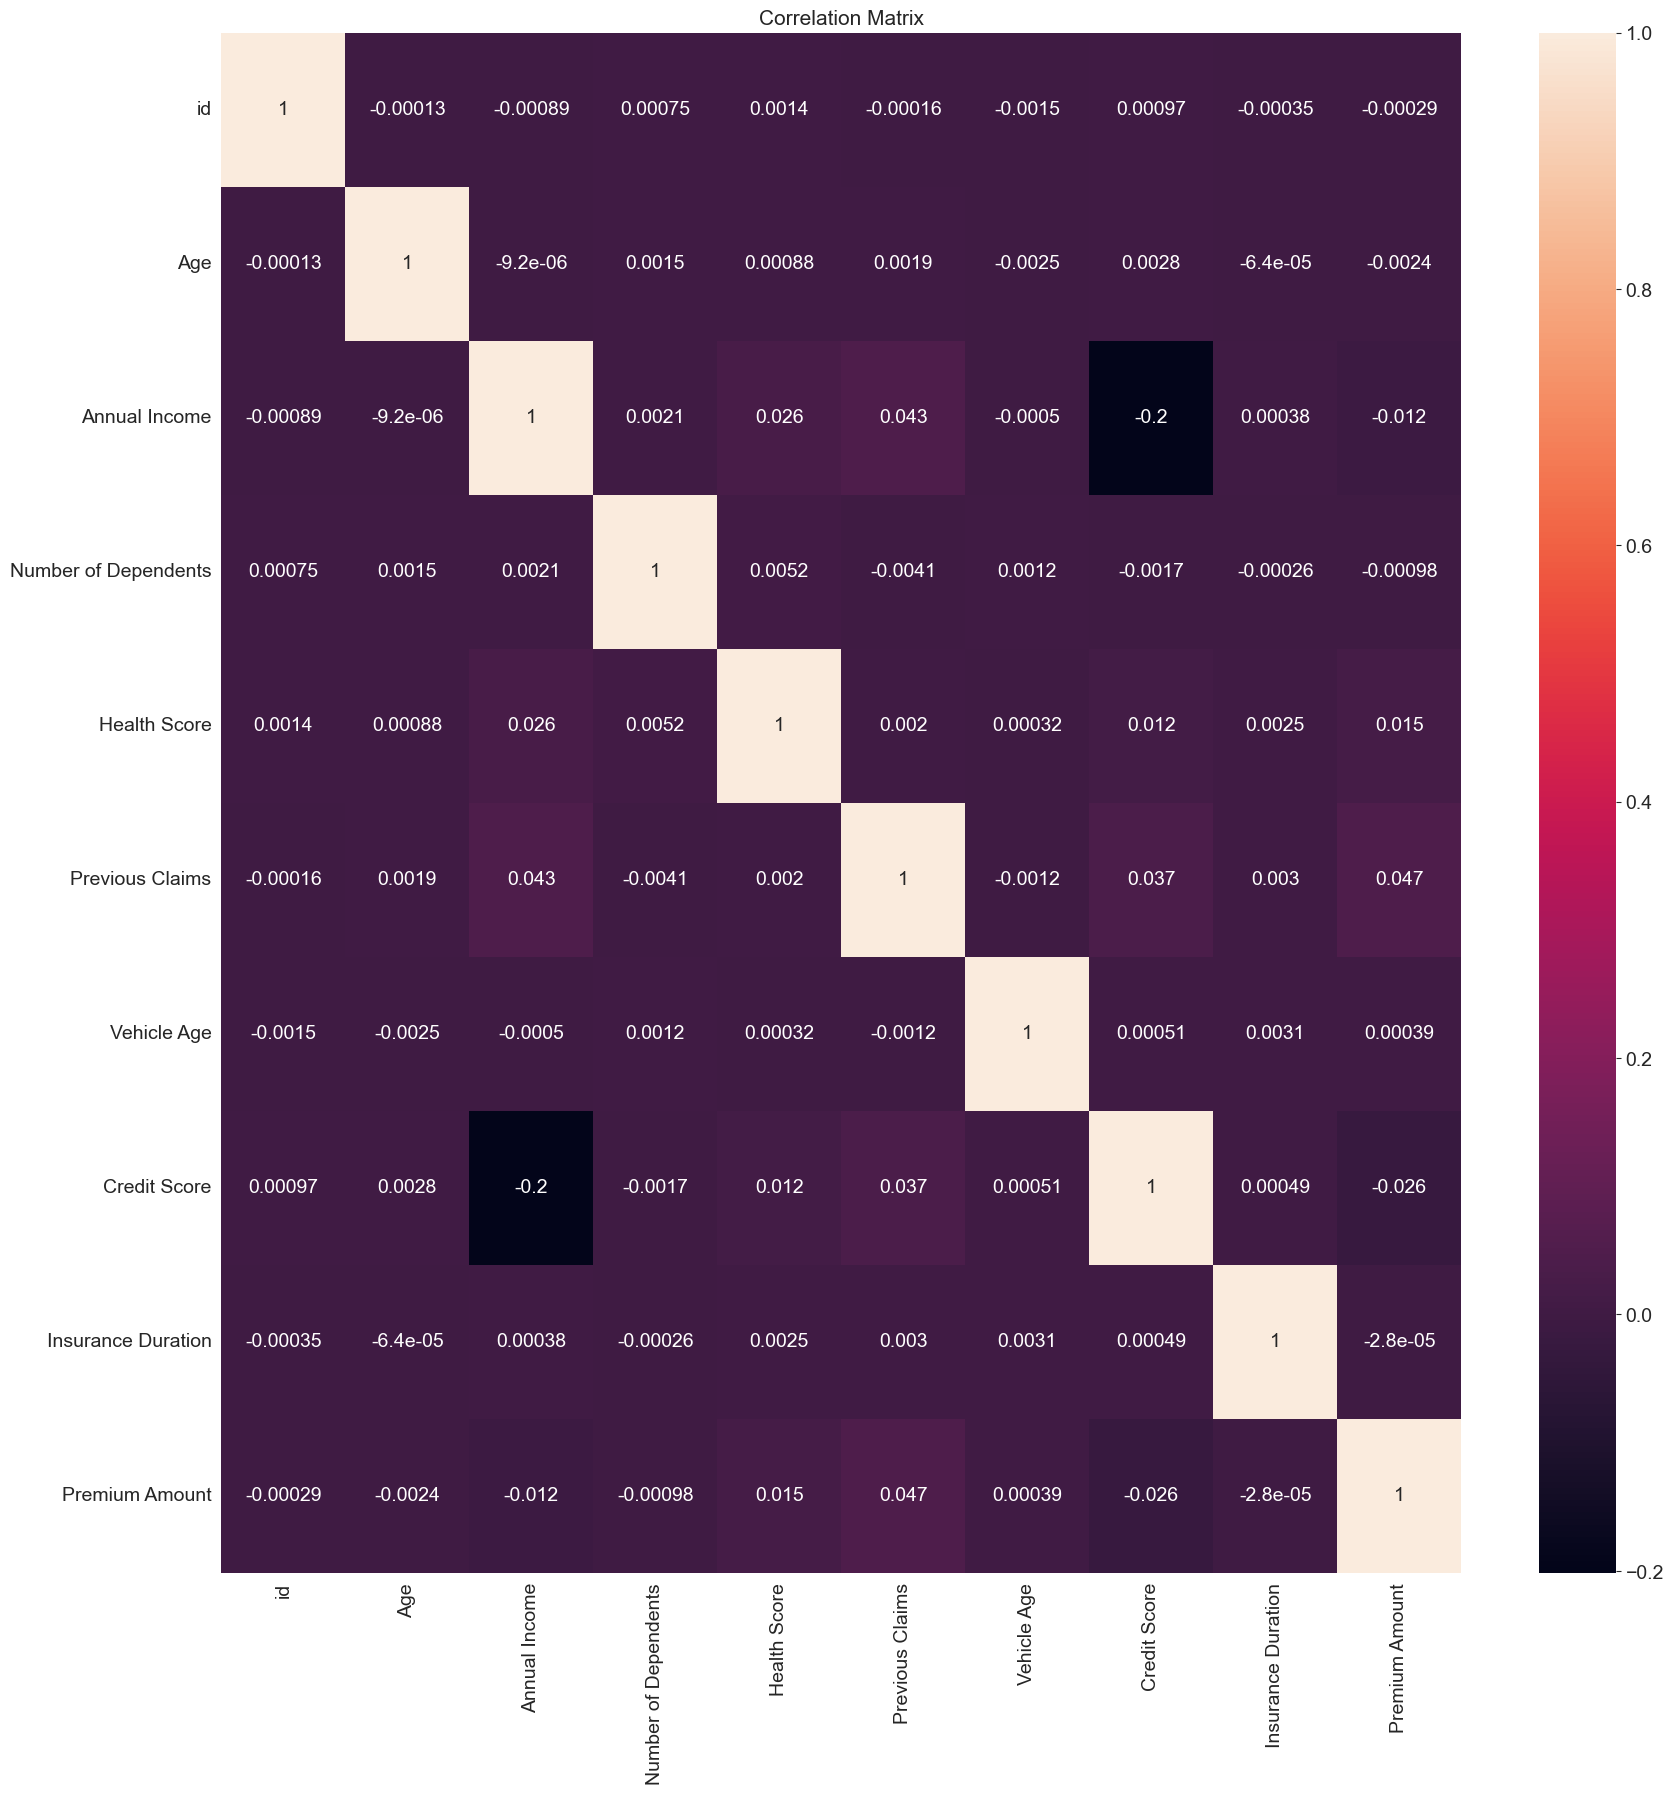

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, ax=ax)
plt.title('Correlation Matrix', fontsize=15)
plt.show()



# Univariate Analysis


In [16]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [17]:
print(data['Vehicle Age'].isna().sum())
print(data['Vehicle Age'].value_counts())
max_vehicle_age = max(data['Vehicle Age'])
min_vehicle_age = min(data['Vehicle Age'])

print(f'Max Vehicle Age: {max_vehicle_age}')
print(f'Min Vehicle Age: {min_vehicle_age}')


6
Vehicle Age
17.0    62577
0.0     61615
11.0    61483
18.0    61399
10.0    61351
15.0    60817
14.0    60815
12.0    60718
19.0    60495
16.0    60314
9.0     59833
2.0     59741
7.0     59700
5.0     59499
3.0     59058
13.0    58684
8.0     58298
4.0     58148
6.0     58084
1.0     57365
Name: count, dtype: int64
Max Vehicle Age: 19.0
Min Vehicle Age: 0.0


In [18]:
def vehicle_age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['Vehicle Age'].between(next,arr[i+1]).sum()
        print(f'Vehicle Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
vehicle_age_group([-1 ,1, 5, 10, 15, float('inf')])

Vehicle Age between 0 and 1: Number of people 118980
Vehicle Age between 2 and 5: Number of people 236446
Vehicle Age between 6 and 10: Number of people 297266
Vehicle Age between 11 and 15: Number of people 302517
Vehicle Age between 16 and inf: Number of people 244785


Possible bins for Vehicle Age:

- 0-1 (Brand New): Vehicles in their warranty period; likely lower risk due to fewer mechanical issues and cautious driving.

- 2-5 (Early Lifecycle): Relatively new vehicles with slightly increased risk as they age.

- 6-10 (Mid-Lifecycle): Moderate age, potentially higher risk due to wear-and-tear and repairs starting.

- 11-15 (Late Lifecycle): Older vehicles, potentially higher risk due to mechanical failures or lower value, leading to different driving behavior.

- 16-19 (Very Old): Vehicles at the end of their lifecycle; higher risk due to frequent breakdowns or reduced safety standards.

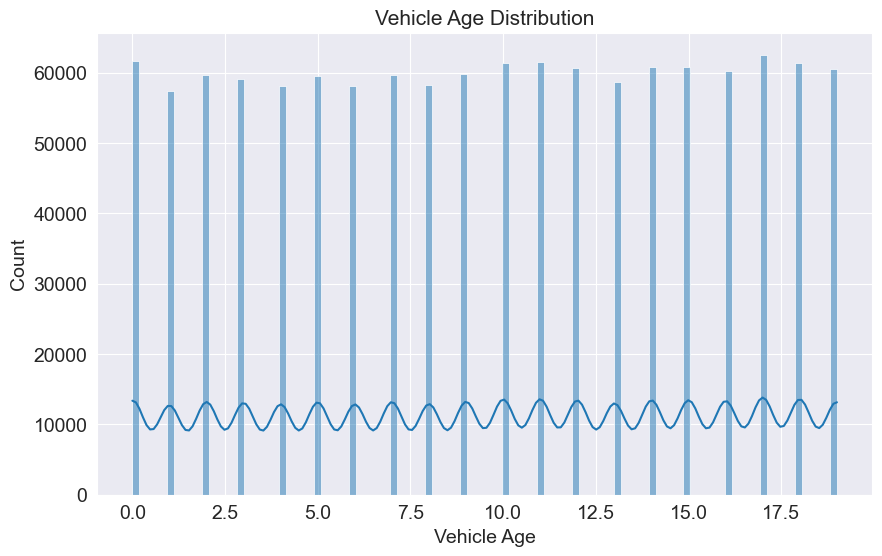

In [19]:
def plot_vehicle_age_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Vehicle Age'],kde=True)
    plt.title('Vehicle Age Distribution',fontsize=15)
    plt.show()

plot_vehicle_age_distribution(data)

In [20]:
print(data['Age'].isna().sum())
print(data['Age'].value_counts())
max_age = max(data['Age'])
min_age = min(data['Age'])

print(f'Max Age: {max_age}')
print(f'Min Age: {min_age}')

18705
Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64
Max Age: 64.0
Min Age: 18.0


In [21]:
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['Age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([17 ,24, 34, 49, float('inf')])



Age between 18 and 24: Number of people 172395
Age between 25 and 34: Number of people 249327
Age between 35 and 49: Number of people 378949
Age between 50 and inf: Number of people 380624



Possible bins for Age

- Young Drivers (18-24): Tend to have higher claim rates due to inexperience.

- Young Professionals (25-34): Risk decreases, but some higher premiums remain.

- Middle-aged Drivers (35-49): Statistically the safest and most experienced group.

- Older Drivers (50-64): Risk starts to increase, but still lower than younger drivers.

In [22]:
print(data['Age'].isna().sum())
print(data['Age'].value_counts())
max_age = max(data['Age'])
min_age = min(data['Age'])

print(f'Max Age: {max_age}')
print(f'Min Age: {min_age}')

18705
Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64
Max Age: 64.0
Min Age: 18.0


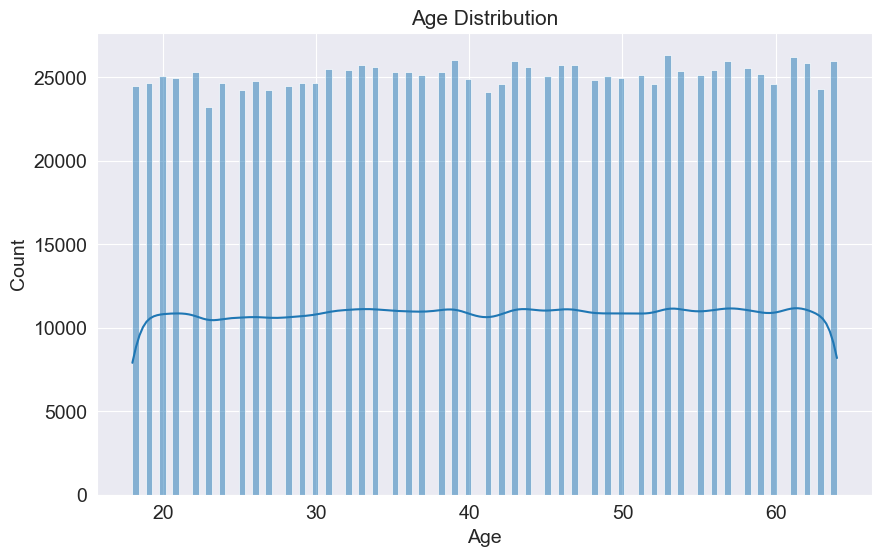

In [23]:
def plot_age_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Age'],kde=True)
    plt.title('Age Distribution',fontsize=15)
    plt.show()

plot_age_distribution(data)

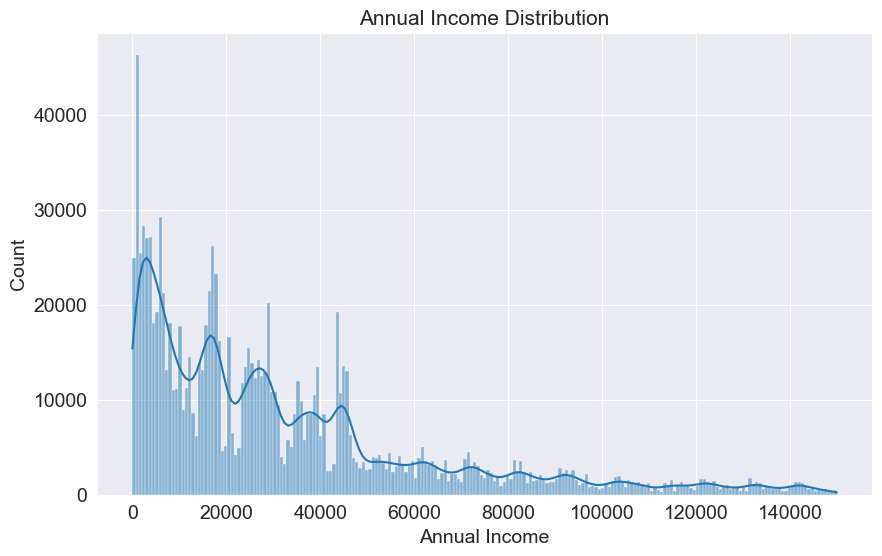

In [24]:
def plot_Anual_Income_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Annual Income'],kde=True)
    plt.title('Annual Income Distribution',fontsize=15)
    plt.show()

plot_Anual_Income_distribution(data)

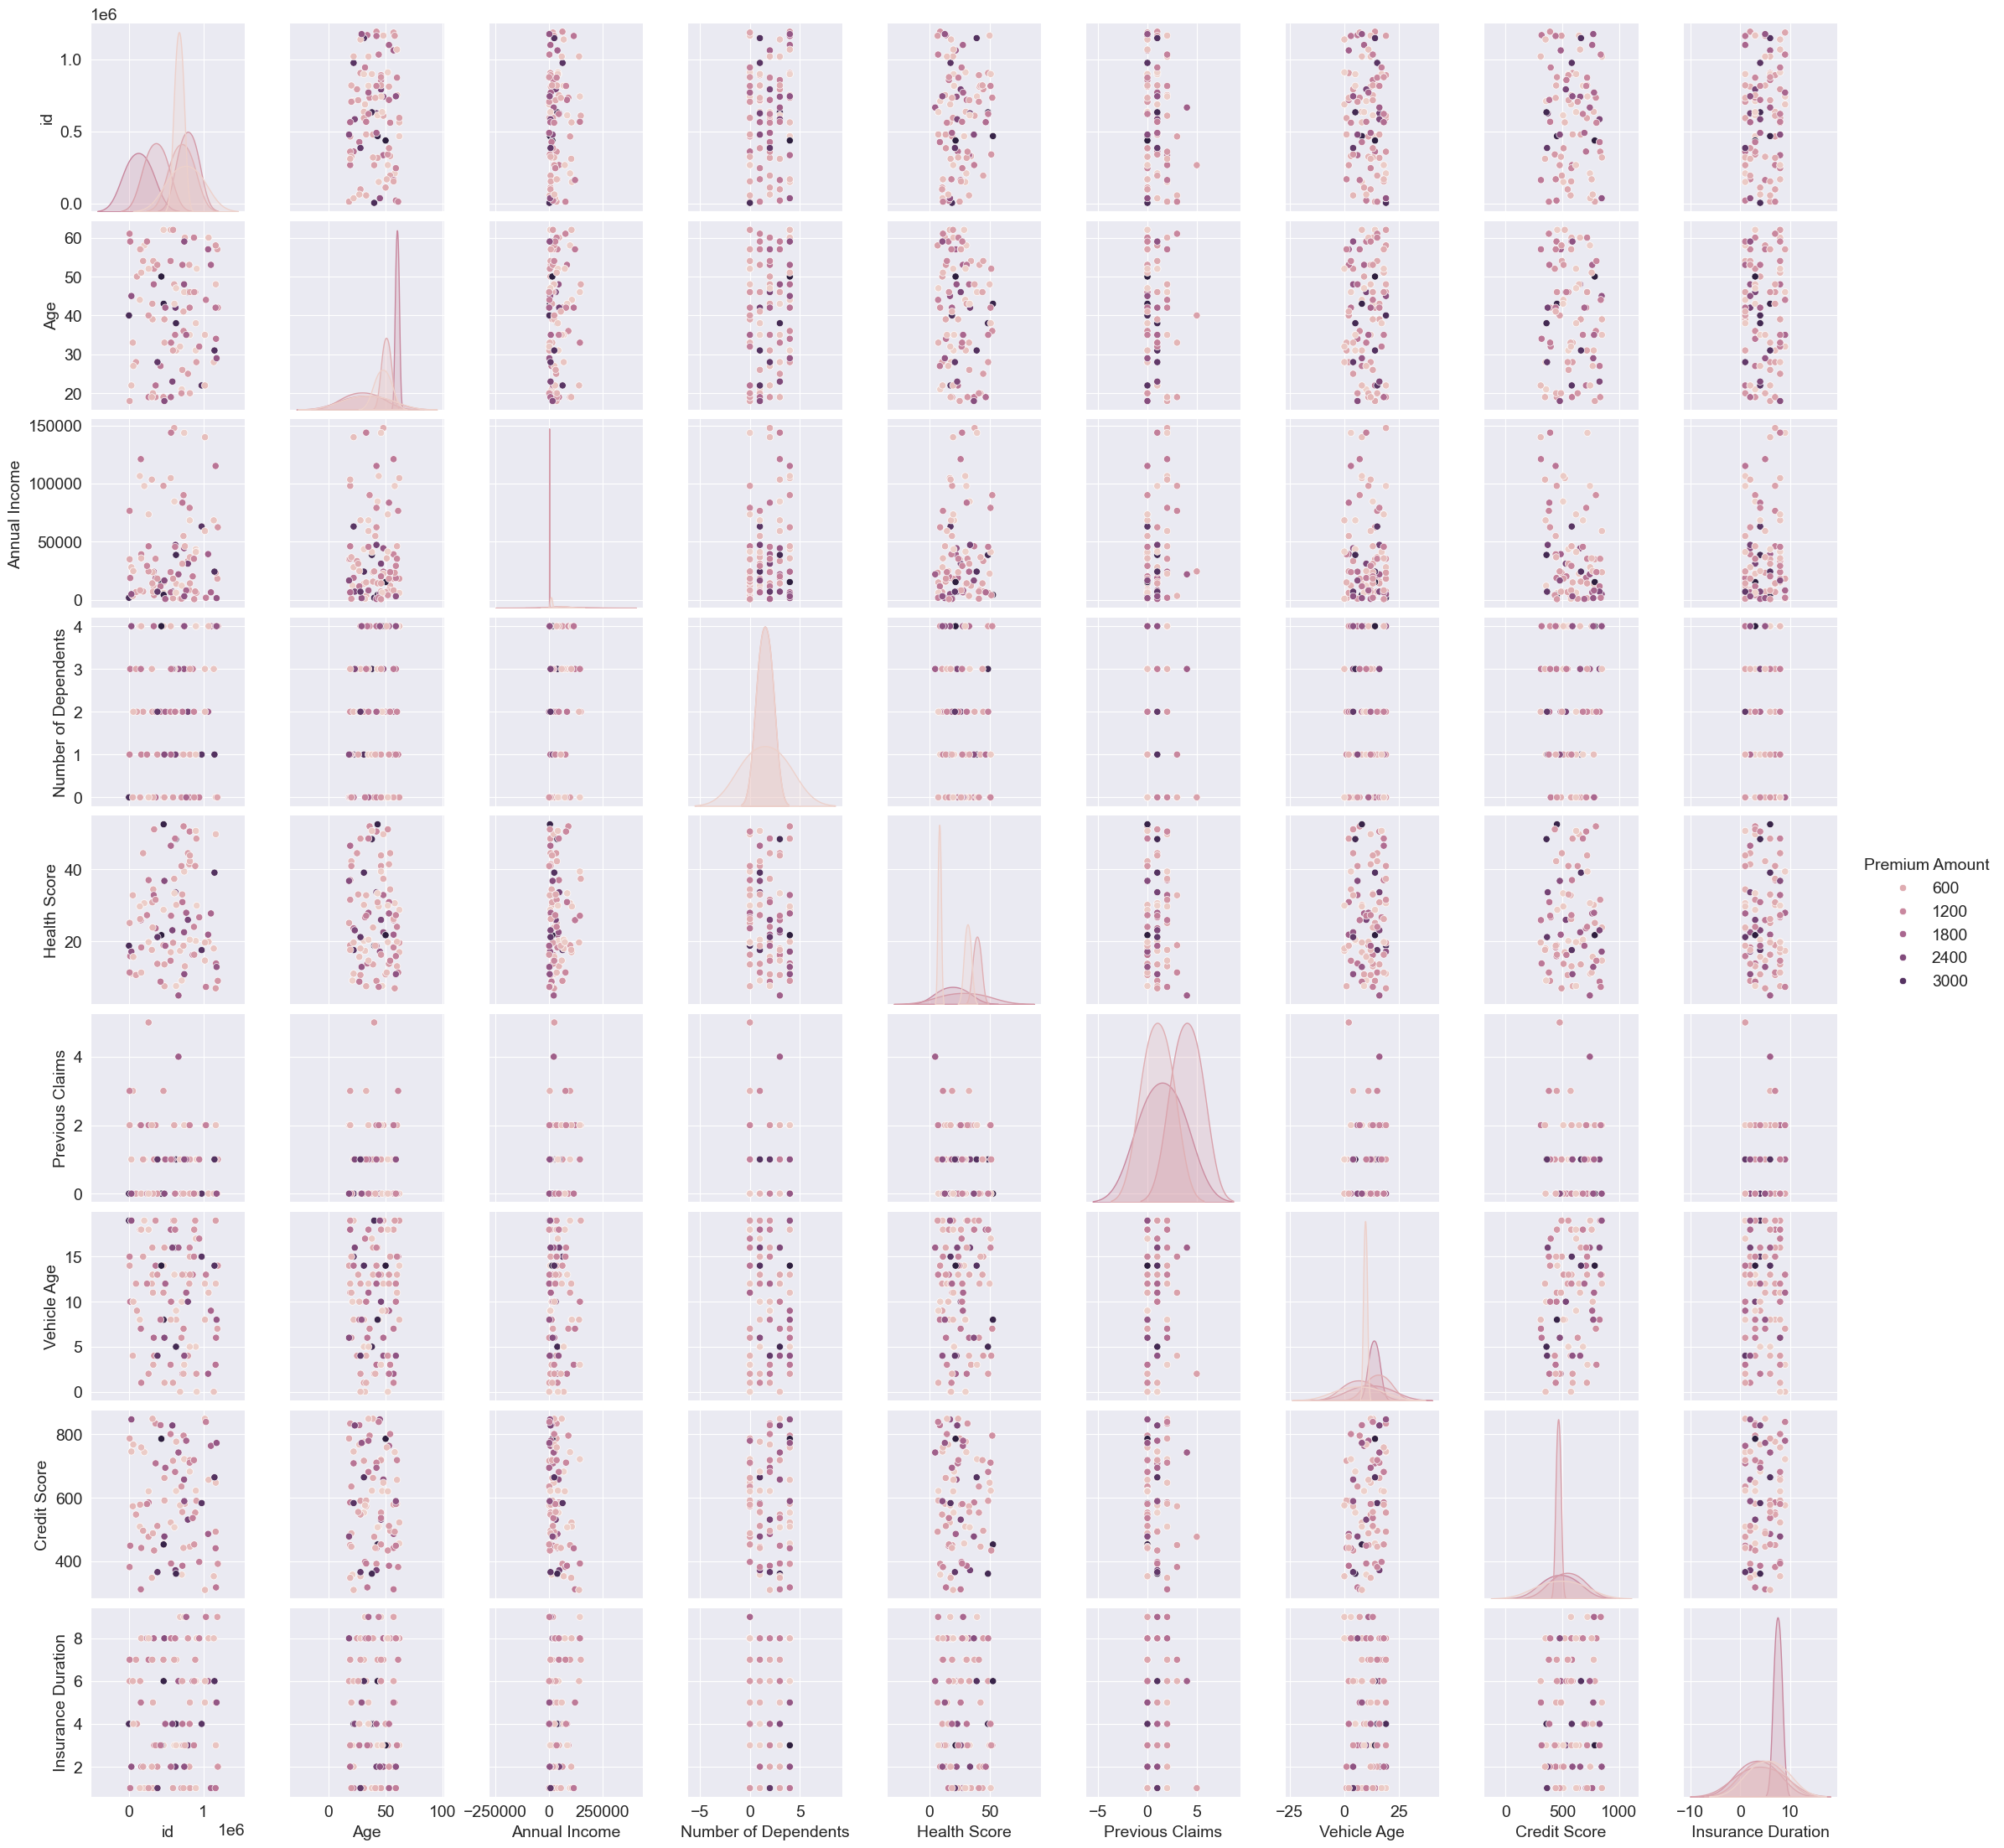

In [25]:
sns.pairplot(data.sample(100), hue='Premium Amount')

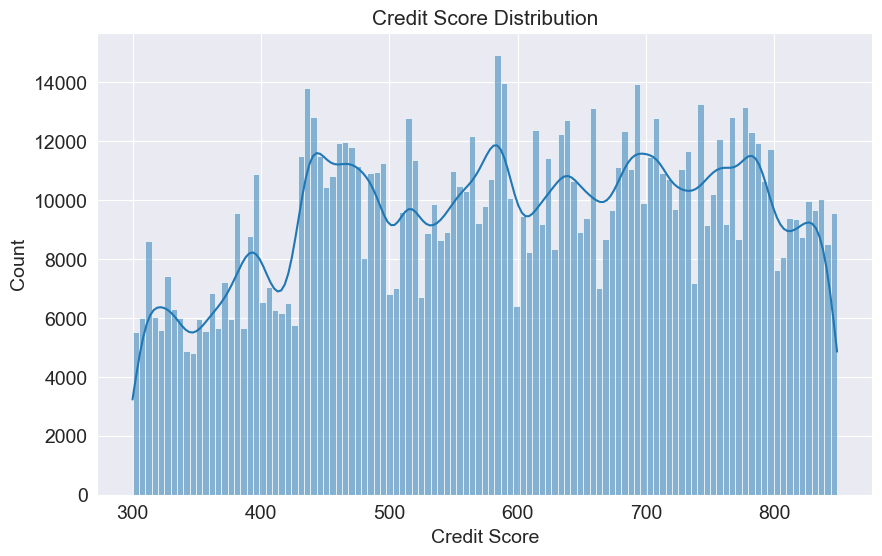

In [26]:
def plot_credit_score_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Credit Score'],kde=True)
    plt.title('Credit Score Distribution',fontsize=15)
    plt.show()

plot_credit_score_distribution(data)

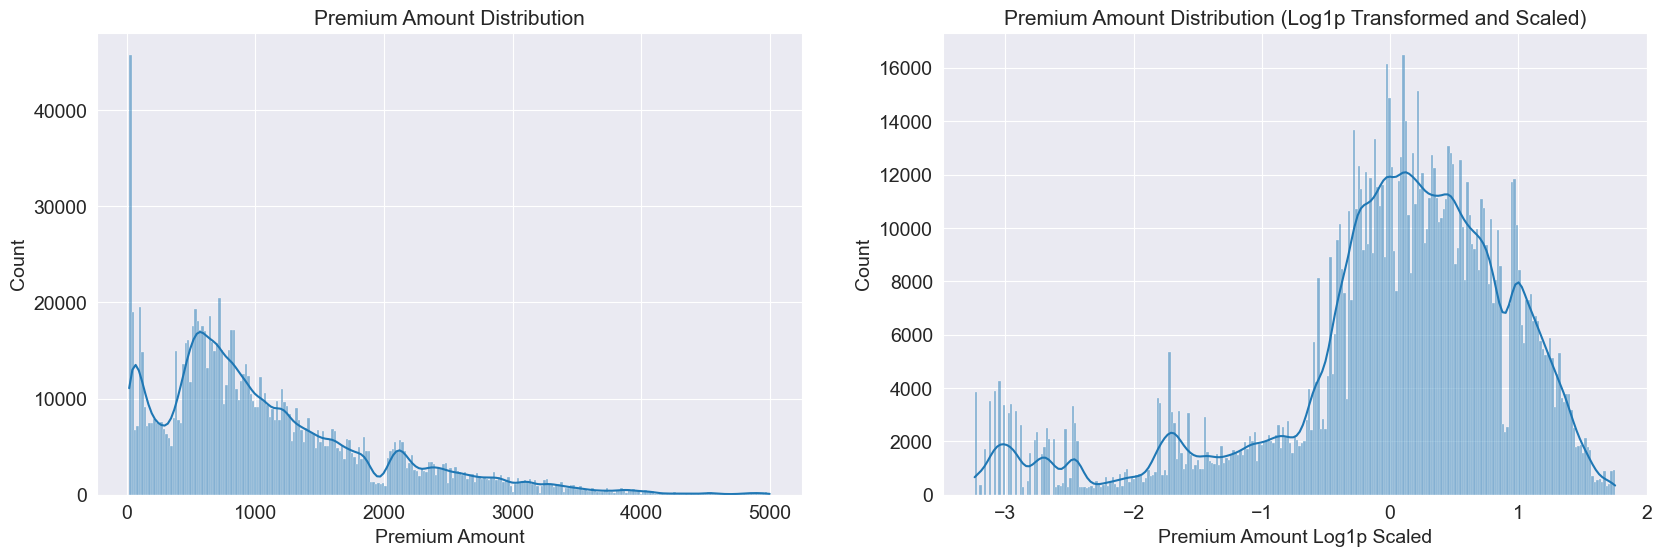

In [27]:
from sklearn.preprocessing import StandardScaler

test = data.copy()

def plot_premium_amount_distribution(data):
    data['Premium Amount Log1p'] = np.log1p(data['Premium Amount'])
    
    scaler = StandardScaler()
    data['Premium Amount Log1p Scaled'] = scaler.fit_transform(data[['Premium Amount Log1p']])
    
    plt.figure(figsize=(20,6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data['Premium Amount'], kde=True)
    plt.title('Premium Amount Distribution', fontsize=15)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data['Premium Amount Log1p Scaled'], kde=True)
    plt.title('Premium Amount Distribution (Log1p Transformed and Scaled)', fontsize=15)
    
    plt.show()

plot_premium_amount_distribution(test)

74076
Health Score
19.927241    128
25.907650    124
19.869701    119
22.955402    104
27.845006    103
            ... 
34.912272      1
23.564147      1
23.054968      1
7.078633       1
11.483482      1
Name: count, Length: 532657, dtype: int64
Max Health Score: 58.97591405405534
Min Health Score: 2.0122371818911766


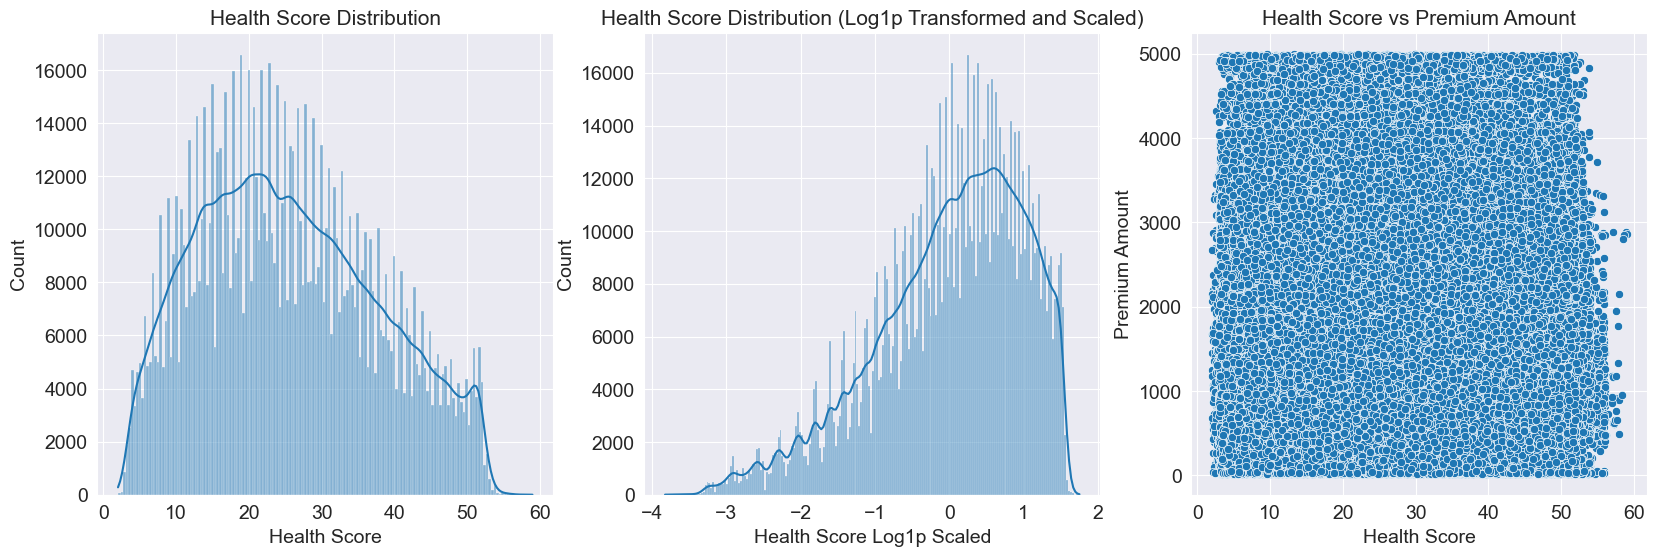

In [28]:
test = data.copy()

print(data['Health Score'].isna().sum())
print(data['Health Score'].value_counts())
max_health_score = max(data['Health Score'])
min_health_score = min(data['Health Score'])

print(f'Max Health Score: {max_health_score}')
print(f'Min Health Score: {min_health_score}')

def plot_health_score_distribution(data):
    scaler = StandardScaler()

    data['Health Score Log1p'] = np.log1p(data['Health Score'])
    data['Health Score Log1p Scaled'] = scaler.fit_transform(data[['Health Score Log1p']])
    
    plt.figure(figsize=(20,6))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data['Health Score'], kde=True)
    plt.title('Health Score Distribution', fontsize=15)
    
    plt.subplot(1, 3, 2)
    sns.histplot(data['Health Score Log1p Scaled'], kde=True)
    plt.title('Health Score Distribution (Log1p Transformed and Scaled)', fontsize=15)
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=data['Health Score'], y=data['Premium Amount'])
    plt.title('Health Score vs Premium Amount', fontsize=15)
    
    plt.show()

plot_health_score_distribution(test)

In [29]:
def health_score_group(arr):
    lenarr = len(arr)
    for i in range(0, lenarr-1):
        next = arr[i]
        num_people = data['Health Score'].between(next, arr[i+1]).sum()
        print(f'Health Score between {next} and {arr[i+1]}: Number of people {num_people}')
        
health_score_group([0, 10, 20, 40,float('inf')])

Health Score between 0 and 10: Number of people 115395
Health Score between 10 and 20: Number of people 300741
Health Score between 20 and 40: Number of people 542978
Health Score between 40 and inf: Number of people 166810


Possible bins for Health Score

- 0–10: Critical

- 11–30: Poor

- 31–50: Good

- 51–60: Excellent


Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


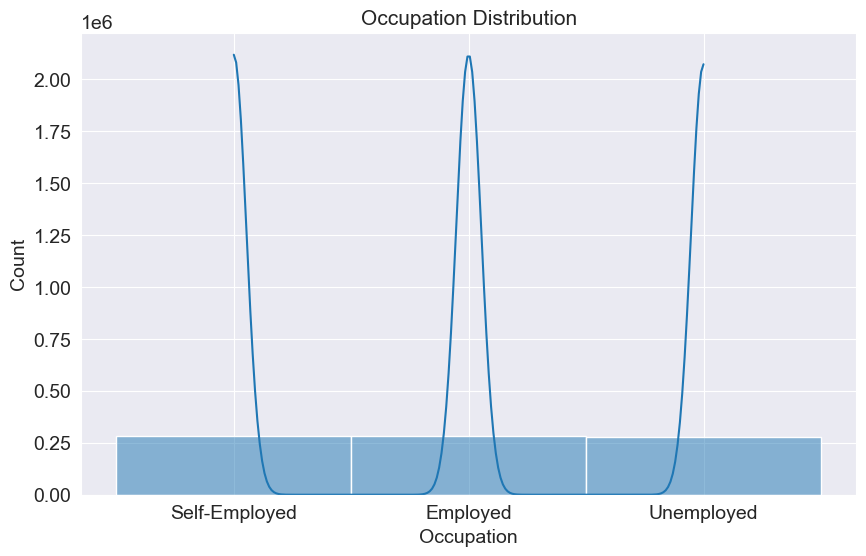

In [30]:
print(data['Occupation'].value_counts())

def plot_occupation_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Occupation'], kde=True)
    plt.title('Occupation Distribution', fontsize=15)
    plt.show()

plot_occupation_distribution(data)

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64


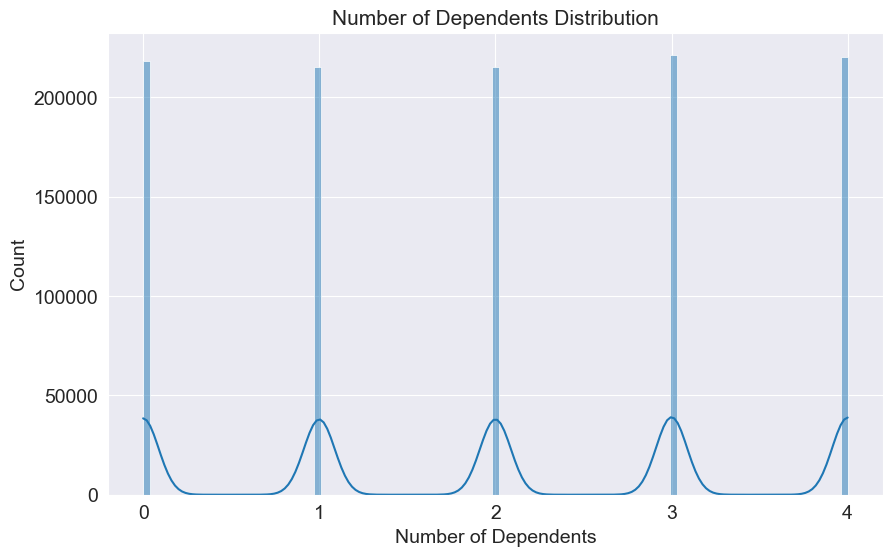

In [31]:
print(data['Number of Dependents'].value_counts())

def plot_number_of_dependents_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Number of Dependents'].dropna().astype(int), kde=True)
    plt.title('Number of Dependents Distribution', fontsize=15)
    plt.xticks([i for i in range(int(data['Number of Dependents'].min()), int(data['Number of Dependents'].max()) + 1)])
    plt.show()

plot_number_of_dependents_distribution(data)

Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64


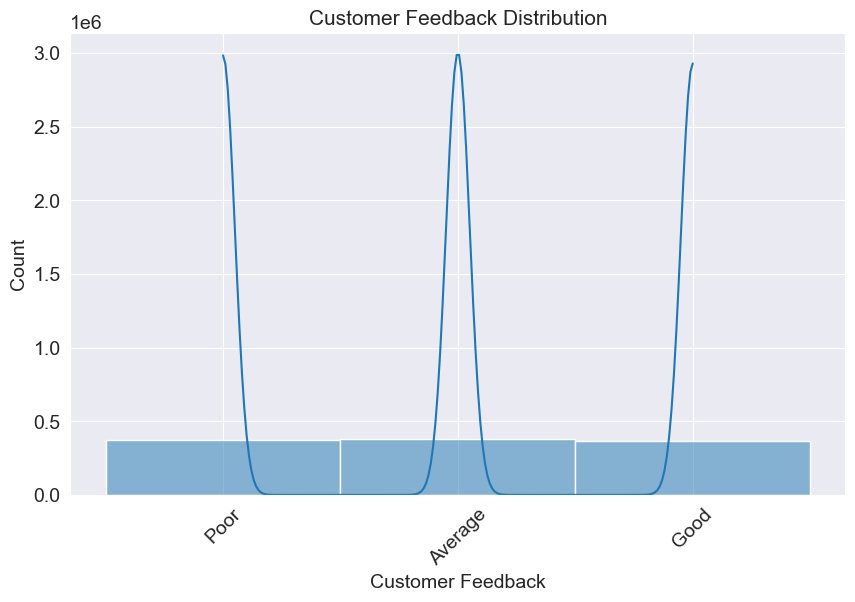

In [32]:
print(data['Customer Feedback'].value_counts())

def plot_customer_feedback_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Customer Feedback'].dropna(), kde=True)
    plt.title('Customer Feedback Distribution', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

plot_customer_feedback_distribution(data)

## <div style="border-radius:0px; border:#66FF99 solid; padding: 15px; font-size:100%; text-align:center">4.Feature Engineering</div>

In [33]:
table(data)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,1024558,61.000000,Female,14897.000000,Married,2.000000,High School,nan,45.753538,Urban,Premium,1.000000,0.000000,nan,7.000000,2023-07-22 15:21:39.237118,Good,Yes,Daily,Apartment,882.000000
1,356808,53.000000,Male,2789.000000,Married,2.000000,High School,Self-Employed,nan,Rural,Comprehensive,0.000000,18.000000,773.000000,7.000000,2021-03-18 15:21:39.148733,Poor,Yes,Monthly,Condo,2654.000000
2,639141,64.000000,Female,16758.000000,Married,4.000000,High School,Employed,44.838448,Urban,Basic,4.000000,3.000000,571.000000,1.000000,2022-03-16 15:21:39.245086,Good,Yes,Daily,Condo,654.000000
3,579400,45.000000,Male,1790.000000,Married,2.000000,Master's,Employed,31.908701,Urban,Premium,2.000000,12.000000,nan,7.000000,2021-08-02 15:21:39.264504,Average,No,Weekly,House,567.000000
4,1110525,37.000000,Female,66964.000000,Married,1.000000,Bachelor's,Self-Employed,32.895417,Suburban,Premium,nan,9.000000,640.000000,8.000000,2021-06-12 15:21:39.132191,Good,No,Weekly,House,368.000000
5,629027,42.000000,Male,25228.000000,Divorced,4.000000,Bachelor's,Unemployed,36.553339,Urban,Basic,0.000000,19.000000,472.000000,8.000000,2023-06-10 15:21:39.237118,Good,No,Weekly,House,517.000000


In [34]:
data.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [35]:
data.shape

(1200000, 21)

In [36]:
def date_features(df):
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Month'] = df['Policy Start Date'].dt.month
    df['Day'] = df['Policy Start Date'].dt.day
    df['Quarter'] = df['Policy Start Date'].dt.quarter
    df['Day of Week'] = df['Policy Start Date'].dt.dayofweek
    df.drop('Policy Start Date', axis=1, inplace=True)
    return df

data = date_features(data)
data_final = date_features(data_final)

In [37]:
data.shape

(1200000, 25)

In [38]:
data_final.shape

(800000, 24)

In [39]:
def add_feature_ratios(df):
    df['Annual_Income_Health_Score_Ratio'] = df['Health Score'] / df['Annual Income']
    df['Annual_Income_Age_Ratio'] = df['Annual Income'] / df['Age']
    df['Credit_Age'] = df['Credit Score'] / df['Age']
    df['Vehicle_Age_Insurance_Duration'] = df['Vehicle Age'] / df['Insurance Duration']
    return df

data = add_feature_ratios(data)
data_final = add_feature_ratios(data_final)

In [40]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type == 'float64':
            df[col] = df[col].astype('float32')
        elif col_type == 'int64':
            df[col] = df[col].astype('int32')
    return df

data = reduce_memory_usage(data)
data_final = reduce_memory_usage(data_final)

In [41]:
def combine_location_property_type(df):
    df['Property Location Type'] = df['Location'] + '_' + df['Property Type']

    df.drop('Property Type', axis=1, inplace=True)
    return df

train = combine_location_property_type(data)
test = combine_location_property_type(data_final)

In [42]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Premium Amount', 'Year',
       'Month', 'Day', 'Quarter', 'Day of Week',
       'Annual_Income_Health_Score_Ratio', 'Annual_Income_Age_Ratio',
       'Credit_Age', 'Vehicle_Age_Insurance_Duration',
       'Property Location Type'],
      dtype='object')

In [43]:
col_list = ['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount']

num_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Year', 'Month', 'Day', 'Quarter', 'Day of Week', 'Annual_Income_Health_Score_Ratio', 'Annual_Income_Age_Ratio', 'Credit_Age', 'Vehicle_Age_Insurance_Duration']
cat_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
skew_cols = ['Annual Income', 'Vehicle Age', 'Health Score', 'Credit Score']


In [44]:
data.drop('id', axis=1, inplace=True)
data_final.drop('id', axis=1, inplace=True)

## <div style="border-radius:0px; border:#66FF99 solid; padding: 15px; font-size:100%; text-align:center">6. Data Preprocessing</div>

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [46]:
for i in skew_cols:
    data[i] = np.log1p(data[i])
    data_final[i] = np.log1p(data_final[i])

In [47]:
target = 'Premium Amount'

numerical_cols = data.select_dtypes(include=['float32', 'int32']).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [48]:
preprocessing = ColumnTransformer([
    ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), numerical_cols),
    ('cat', make_pipeline(SimpleImputer(strategy='constant', fill_value='unknown'),
                          OneHotEncoder(handle_unknown='ignore')), categorical_cols)
], remainder='drop')

In [49]:
X_train = data.drop(columns=[target])
y_train = np.log1p(data[target]) 
X_test = data_final.copy()

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)

In [50]:
from sklearn.model_selection import train_test_split

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_preprocessed, y_train, train_size=0.1, random_state=42
)
x_train, x_test, y_train, y_test = train_test_split(
    X_train_small, y_train_small, test_size=0.2, random_state=42
)

In [51]:
x_train.shape

(96000, 56)

In [52]:
x_test.shape

(24000, 56)

In [53]:
y_train.shape

(96000,)

In [54]:
y_test.shape

(24000,)

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">7. Machine Learning</div>

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score



In [56]:
lr = LinearRegression()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()
catr = CatBoostRegressor(verbose=0)
lgbm = LGBMRegressor()
sgd = SGDRegressor()

In [57]:
regr = {
    'LR': lr, 
    'RF': rfr, 
    'AdaBoost': abr, 
    'BgR': br, 
    'ETR': etr,
    'GBR': gbr,
    'xgbr': xgbr,
    'catr': catr,
    'lgbm': lgbm,
    'sgd': sgd
}

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [59]:

def train_regressor(regr, X_train, y_train, X_test, y_test):
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    return mse, rmse, r2, mae, evs

In [60]:

metrics = {
    'mse': [],
    'rmse': [],
    'r2': [],
    'mae': [],
    'evs': []
}

for name, reg in regr.items():
    mse, rmse, r2, mae, evs = train_regressor(reg, x_train, y_train, x_test, y_test)
    
    print(f"{name} Model Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"First 5 Actual Values: {y_test[:5].tolist()}")
    print(f"First 5 Predicted Values: {reg.predict(x_test)[:5].tolist()}\n")
    
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)
    metrics['mae'].append(mae)
    metrics['evs'].append(evs)

LR Model Performance:
Mean Squared Error: 1.2003
Root Mean Squared Error: 1.0956
R2 Score: 0.0160
Mean Absolute Error: 0.7974
Explained Variance Score: 0.0161
First 5 Actual Values: [7.961021423339844, 6.484635353088379, 6.251904010772705, 7.597898006439209, 7.4938740730285645]
First 5 Predicted Values: [6.44677734375, 6.52490234375, 6.61865234375, 6.67138671875, 6.861328125]

RF Model Performance:
Mean Squared Error: 1.1438
Root Mean Squared Error: 1.0695
R2 Score: 0.0623
Mean Absolute Error: 0.7710
Explained Variance Score: 0.0643
First 5 Actual Values: [7.961021423339844, 6.484635353088379, 6.251904010772705, 7.597898006439209, 7.4938740730285645]
First 5 Predicted Values: [6.447772190570832, 6.502750163078308, 6.682203247547149, 6.552903459072113, 6.596271703243255]

AdaBoost Model Performance:
Mean Squared Error: 1.2088
Root Mean Squared Error: 1.0995
R2 Score: 0.0090
Mean Absolute Error: 0.8262
Explained Variance Score: 0.0416
First 5 Actual Values: [7.961021423339844, 6.48463535

  File "C:\Users\Lorenzo.locker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 56
[LightGBM] [Info] Start training from score 6.588859
lgbm Model Performance:
Mean Squared Error: 1.1090
Root Mean Squared Error: 1.0531
R2 Score: 0.0908
Mean Absolute Error: 0.7486
Explained Variance Score: 0.0909
First 5 Actual Values: [7.961021423339844, 6.484635353088379, 6.251904010772705, 7.597898006439209, 7.4938740730285645]
First 5 Predicted Values: [6.659519108055973, 6.6268281264604445, 6.638035564052784, 6.653437768223569, 6.662623309041283]

sgd Model Performance:
Mean Squared Error: 1.2062
Root Mean Squared Error: 1.0983
R2 Score: 0.0112
Mean Absolute Error: 0.8087
Explained Variance Score: 0.0128
First 5 Actual Values: [7.961

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">8. HyperParameter</div>

In [82]:
results = {}

def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'EVS': evs,
        'RMSLE': rmsle
    }

    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Root Mean Squared Log Error: {rmsle:.4f}")
    print()

def plot_comparison(results):
    metrics = ['MSE', 'RMSE', 'R2', 'MAE', 'EVS', 'RMSLE']
    models = list(results.keys())
    num_metrics = len(metrics)

    x = np.arange(len(models))
    width = 0.15
    colors = plt.cm.get_cmap('tab10', num_metrics)

    plt.figure(figsize=(14, 8))

    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in models]
        bars = plt.bar(x + i * width, values, width, label=metric, color=colors(i))
        
        for bar, value in zip(bars, values):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{value:.2f}",
                ha='center', va='bottom', rotation=45, fontsize=10
            )
    
    plt.title("Model Comparison Across Metrics", fontsize=16)
    plt.xlabel("Models", fontsize=12)
    plt.ylabel("Metric Values", fontsize=12)
    plt.xticks(x + width * (num_metrics - 1) / 2, models, rotation=45)
    plt.legend(title="Metrics")
    plt.tight_layout()
    plt.show()




In [61]:
cat_model = CatBoostRegressor(
    iterations=1000,
    depth=10,
    learning_rate=0.05,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
cat_model.fit(x_train, y_train, eval_set=(x_test, y_test))

params_lgb = {
    "objective": "regression",
    "metric": "rmse",
    "random_state": 42,
    "verbose": -1,
    "learning_rate": 0.005,
    "max_depth": -1,
    "lambda_l1": 8.061284137884293,
    "lambda_l2": 0.1808845183357011,
    "num_leaves": 53,
    "feature_fraction": 0.8,
    "min_child_samples": 50,
}

train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

lgb_model = lgb.train(
    params_lgb,
    train_data,
    num_boost_round=10000,
    valid_sets=[train_data, test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=500, verbose=True),
        lgb.log_evaluation(250),
    ]
)

rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(x_train, y_train)

xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

xgb_model.fit(x_train, y_train, verbose=True)

0:	learn: 1.0968561	test: 1.1004446	best: 1.1004446 (0)	total: 97.7ms	remaining: 1m 37s
100:	learn: 1.0300926	test: 1.0556867	best: 1.0556867 (100)	total: 2.47s	remaining: 22s
200:	learn: 1.0010723	test: 1.0554938	best: 1.0553686 (170)	total: 5.04s	remaining: 20s
300:	learn: 0.9753743	test: 1.0555623	best: 1.0553686 (170)	total: 7.58s	remaining: 17.6s
400:	learn: 0.9521966	test: 1.0559881	best: 1.0553686 (170)	total: 10.3s	remaining: 15.4s
500:	learn: 0.9289423	test: 1.0569438	best: 1.0553686 (170)	total: 13s	remaining: 13s
600:	learn: 0.9064769	test: 1.0578562	best: 1.0553686 (170)	total: 15.8s	remaining: 10.5s
700:	learn: 0.8845430	test: 1.0586467	best: 1.0553686 (170)	total: 18.6s	remaining: 7.91s
800:	learn: 0.8636322	test: 1.0597761	best: 1.0553686 (170)	total: 21.5s	remaining: 5.34s
900:	learn: 0.8424235	test: 1.0603681	best: 1.0553686 (170)	total: 24.4s	remaining: 2.68s
999:	learn: 0.8231968	test: 1.0610933	best: 1.0553686 (170)	total: 27.3s	remaining: 0us

bestTest = 1.05536855

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

CatBoost Performance:
Mean Squared Error: 1.1138
Root Mean Squared Error: 1.0554
R2 Score: 0.0869
Mean Absolute Error: 0.7519
Explained Variance Score: 0.0869
Root Mean Squared Log Error: 0.1602

RandomForest Performance:
Mean Squared Error: 1.1127
Root Mean Squared Error: 1.0549
R2 Score: 0.0878
Mean Absolute Error: 0.7497
Explained Variance Score: 0.0878
Root Mean Squared Log Error: 0.1602

XGBoost Performance:
Mean Squared Error: 1.1101
Root Mean Squared Error: 1.0536
R2 Score: 0.0899
Mean Absolute Error: 0.7494
Explained Variance Score: 0.0899
Root Mean Squared Log Error: 0.1600

LightGBM Performance:
Mean Squared Error: 1.1061
Root Mean Squared Error: 1.0517
R2 Score: 0.0932
Mean Absolute Error: 0.7476
Explained Variance Score: 0.0932
Root Mean Squared Log Error: 0.1597



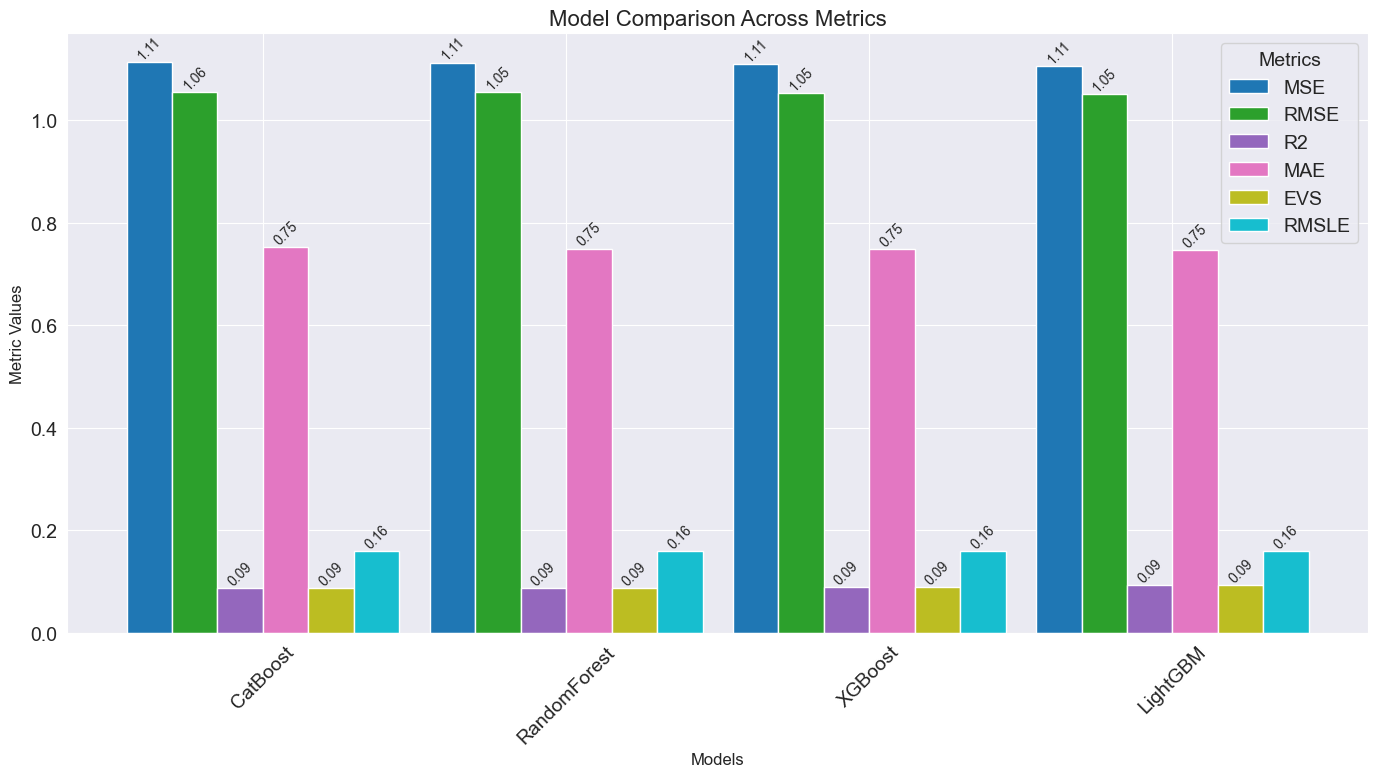

In [83]:
evaluate_model(cat_model, "CatBoost", x_test, y_test)
evaluate_model(rf_model, "RandomForest", x_test, y_test)
evaluate_model(xgb_model, "XGBoost", x_test, y_test)
evaluate_model(lgb_model, "LightGBM", x_test, y_test)

plot_comparison(results)


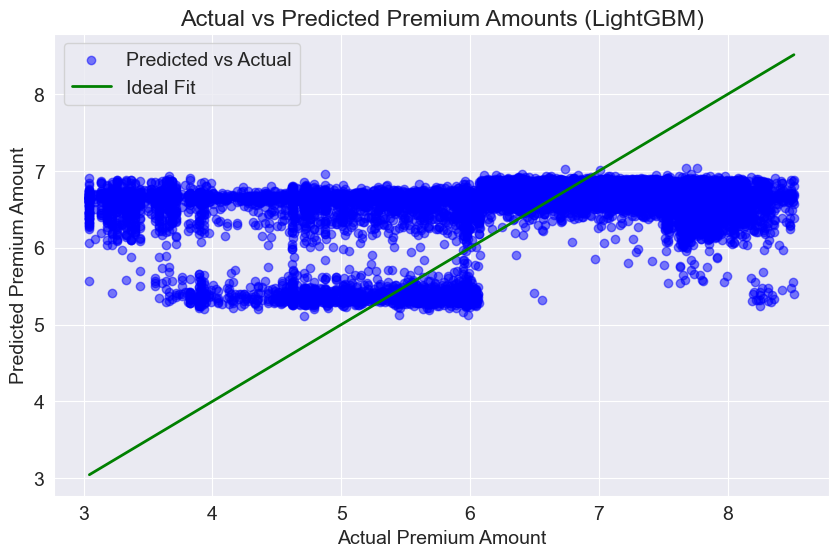

In [76]:
y_pred_lgb = lgb_model.predict(x_test)

comparison_df_lgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lgb})

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_lgb['Actual'], comparison_df_lgb['Predicted'], alpha=0.5, label='Predicted vs Actual', color='blue')
plt.plot([comparison_df_lgb['Actual'].min(), comparison_df_lgb['Actual'].max()], 
         [comparison_df_lgb['Actual'].min(), comparison_df_lgb['Actual'].max()], 
         color='green', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Premium Amounts (LightGBM)')
plt.xlabel('Actual Premium Amount')
plt.ylabel('Predicted Premium Amount')
plt.legend()
plt.show()


In [134]:
pred = lgb_model.predict(X_test_preprocessed)
pred = np.exp(pred)
output = pd.DataFrame({'id': data_final2['id'], 'Premium Amount': pred})
output.to_csv('predictions.csv', index=False)